In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
import matplotlib.colors as colors
import cartopy.feature as cfea

In [2]:
root = '/your/directory/path'
gwp_path = f"{root}/gpw_v4_population_count_adjusted_rev11_2pt5_min.nc"
data = nc.Dataset(gwp_path)
print(data)
gpw4 = data.variables['UN WPP-Adjusted Population Count, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes']
print(f"pop.shape: {gpw4.shape}")

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    proj4: +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0
    Conventions: CF-1.4
    created_by: R, packages ncdf4 and raster (version 2.8-4)
    date: 2018-11-16 10:00:37
    dimensions(sizes): longitude(8640), latitude(4320), raster(20)
    variables(dimensions): float64 longitude(longitude), float64 latitude(latitude), int32 raster(raster), float32 UN WPP-Adjusted Population Count, v4.11 (2000, 2005, 2010, 2015, 2020): 2.5 arc-minutes(raster, latitude, longitude)
    groups: 
pop.shape: (20, 4320, 8640)


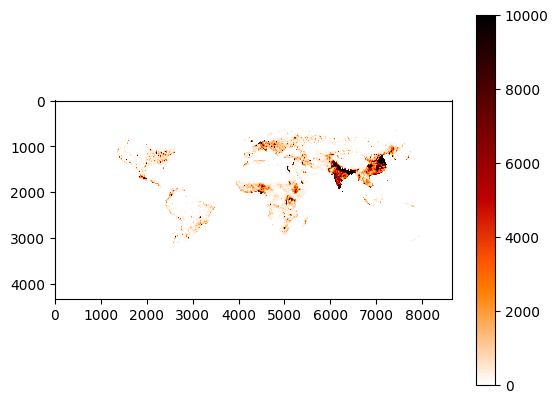

In [4]:
# 2010
r2gl2 = gpw4[2, :, :]
plt.imshow(r2gl2, cmap='gist_heat_r', vmax=1e4)
plt.colorbar()

In [6]:
# map/pre/prog_map_C05_pop.f
# lib/calc_uscale.f
# lib/conv_r2tor1.f
def upscale(i0x1max, i0y1max, i0x2max, i0y2max, r2vhr, c0opt):
    # upscale r2vhr to r2out
    # missing value
    r2out = np.empty((i0y1max, i0x1max))
    p0mis=1e20
    # 4320, 2160 loop
    for i0y1 in range(i0y1max):
        for i0x1 in range(i0x1max):
            r0sum=0.0
            i0cnt=0
            # 2x2 summation loop
            for i0y2 in range(i0y2max):
                for i0x2 in range(i0x2max):
                    # x location of r2vhr 
                    i0x = (i0x1)*i0x2max+i0x2
                    # y location of r2vhr
                    i0y = (i0y1)*i0y2max+i0y2
                    r0dat = r2vhr[i0y, i0x]
                    # not to add if missig value
                    if r0dat != p0mis:
                        r0sum = r0sum + r0dat
                        i0cnt = i0cnt + 1
            # option
            if c0opt == 'sum':
                # save summed value
                if i0cnt > 0:
                    r2out[i0y1, i0x1] = r0sum
                # if no data in a big cell > missing value
                else:
                    r2out[i0y1, i0x1] = p0mis
        if  i0y1%100 == 0:
            print(f"i0y1: {i0y1}")
    return r2out

In [7]:
r2gl5 = upscale(4320, 2160, 2, 2, r2gl2, 'sum')

i0y1: 0
i0y1: 100
i0y1: 200
i0y1: 300
i0y1: 400
i0y1: 500
i0y1: 600
i0y1: 700
i0y1: 800
i0y1: 900
i0y1: 1000
i0y1: 1100
i0y1: 1200
i0y1: 1300
i0y1: 1400
i0y1: 1500
i0y1: 1600
i0y1: 1700
i0y1: 1800
i0y1: 1900
i0y1: 2000
i0y1: 2100


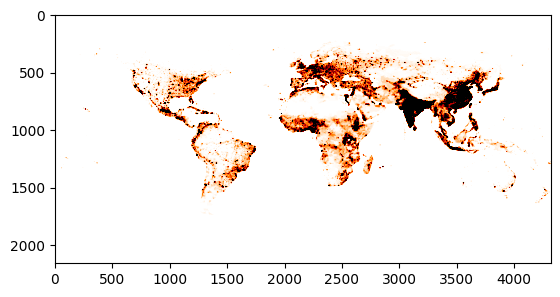

In [8]:
r2gl5_masked = np.ma.masked_where(r2gl5 == 1e20, r2gl5)
r2gl5_filled = r2gl5_masked.filled(0)
plt.imshow(r2gl5_filled, cmap='gist_heat_r', vmax=1e4)
plt.show()

In [100]:
# wrte_binary
save_flag = False
if save_flag is True:
    savepath_gl5 = f"{workdir}/GPW4ag__20100000.gl5" 
    r2gl5_filled.astype(np.float32).tofile(savepath_gl5)